In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
housing_data = io.loadmat("data/housing_data.mat")
training_X = housing_data['Xtrain']
training_Y = housing_data['Ytrain']
validation_X = housing_data['Xvalidate']
validation_Y = housing_data['Yvalidate']

In [6]:
class linear_regression:
    def __init__(self, bias=False):
        self.bias = bias
        self.coefficient = None

    def fit(self, X, Y):
        if self.bias:
            X = np.insert(X, X.shape[1], 1, axis=1)
        a = np.dot(X.T, X)
        b = np.dot(X.T, Y)
        a_invese = np.linalg.inv(a)
        self.coefficient = np.dot(a_invese, b)

    def predict(self, X):
        if self.bias:
            X = np.insert(X, X.shape[1], 1, axis=1)
        return np.dot(X, self.coefficient)
    
    def RSS(self, X, Y):
        if self.bias:
            X = np.insert(X, X.shape[1], 1, axis=1)
        predicted = np.dot(X, self.coefficient)
        square_diff = (validation_Y - predicted) ** 2
        return np.sum(square_diff)
    

In [7]:
housing_classifier = linear_regression(bias=True)
housing_classifier.fit(training_X, training_Y)

In [8]:
rss = housing_classifier.RSS(validation_X, validation_Y)
print("The RSS of the housing validation set is %f" % rss)

The RSS of the housing validation set is 5794953797667.052734


In [9]:
predicted = housing_classifier.predict(validation_X)
min_price = min(predicted)
max_price = max(predicted)
print("The median home value range from %f to %f" % (min_price, max_price))

The median home value range from -56562.827544 to 710798.838692


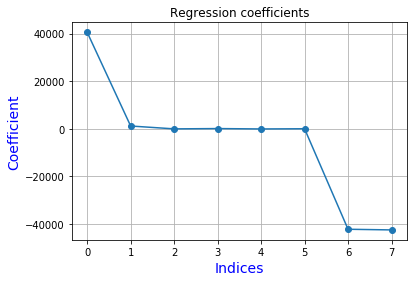

In [11]:
coefficients = plt.figure(1)
plt.title("Regression coefficients")
indices = range(len(housing_classifier.coefficient)-1)
plt.plot(indices, housing_classifier.coefficient[0:-1], linestyle='-', marker='o')
plt.xlabel('Indices', fontsize=14, color='blue')
plt.ylabel('Coefficient', fontsize=14, color='blue')
plt.grid(True)

(array([   1.,    1.,    0.,    0.,    0.,    1.,    1.,    2.,    1.,
           1.,    1.,    1.,    2.,    2.,    3.,    4.,    3.,    6.,
           5.,    6.,    8.,   12.,   10.,   10.,   25.,   30.,   27.,
          24.,   30.,   36.,   47.,   55.,   68.,   71.,   83.,   95.,
          84.,   94.,  100.,   72.,   51.,   37.,   33.,   16.,   14.,
           7.,    4.,    1.,    3.,    2.,    2.,    0.,    5.,    0.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.]),
 array([-345249.5455547 , -335067.3113744 , -324885.07719411,
        -314702.84301381, -304520.60883351, -294338.37465321,
        -284156.14047292, -273973.90629262, -263791.67211232,
        -253609.43793203, -243427.20375173, -233244.96957143,
        -223062.73539114, -212880.50121084, -202698.26703054,
        -192516.03285024, -182333.79866995, -172151.56448965,
        -161969.33030935, -15

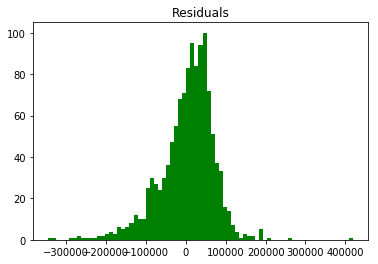

In [12]:
residuals = plt.figure(2)
plt.title("Residuals")

residuals_val = housing_classifier.predict(validation_X) - validation_Y
plt.hist(residuals_val, 75, facecolor='green')